In [ ]:
import torch
torch.cuda.empty_cache()

# Confirm that the GPU is detected

assert torch.cuda.is_available()

# Get the GPU device name.
device_name = torch.cuda.get_device_name()
n_gpu = torch.cuda.device_count()
print(f"Found device: {device_name}, n_gpu: {n_gpu}")
device = torch.device("cuda")

Found device: NVIDIA A100-SXM-80GB MIG 3g.40gb, n_gpu: 1


In [ ]:
import random
import numpy as np

def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

seed_everything()

In [ ]:
!pip install transformers
!pip install -U -q PyDrive

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from helpers import tokenize_and_format, flat_accuracy

In [ ]:
import pandas as pd
df = pd.read_csv('mutli_clean.csv')

In [ ]:
df

,Unnamed: 0,ID,tweet,label,cleaned
0,0,mul_train_00001,if i dey enter your eye or you like me and no ...,positive,if i dey enter your eye or you like me and no ...
1,1,mul_train_00002,@user @user Ndi igbo is na ara di na udi,negative,Ndi igbo is na ara di na udi
2,2,mul_train_00003,كاملين بيوكوم عنستفكوم من فوق شواية الا بنكيرا...,negative,كاملين بيوكوم عنستفكوم من فوق شواية الا بنكيرا...
3,3,mul_train_00004,SAMIA ATOA ANGALIZO KUIKABILI SARATANI Makamu ...,neutral,SAMIA ATOA ANGALIZO KUIKABILI SARATANI Makamu ...
4,4,mul_train_00005,"5. Dùnùndún, ọ̀jọ̀jọ̀, ____ Ẹ̀bà, ____, àmàlà ...",neutral,Dùnùndún ọ̀jọ̀jọ̀ Ẹ̀bà àmàlà Ibeere Yoruba
...,...,...,...,...,...
63680,63680,mul_train_63681,ትዊተር እንደ ዛሬ ደባሪ ሆኖ አያውቅም።ህዝቤ ወጥሮ ጭራውን እየቆላ ነው።,negative,ትዊተር እንደ ዛሬ ደባሪ ሆኖ አያውቅም።ህዝቤ ወጥሮ ጭራውን እየቆላ ነው።
63681,63681,mul_train_63682,"Ọ̀tàkìtì pọ́n'wọ́ lá, Ò b'omi 'ẹ́nu fẹ́'ná jó,...",positive,Ọ̀tàkìtì pọ́nwọ́ lá Ò bomi ẹ́nu fẹ́ná jó Ò fìd...
63682,63682,mul_train_63683,غير انا الي مجانيش دعم من هاذا التيم واقيل 💔 @...,negative,غير انا الي مجانيش دعم من هاذا التيم واقيل
63683,63683,mul_train_63684,ከነ ድንኳኑ ነዋ ለዛውም ???♂️?????? የሠርግ ይሁን የለቅሶ እሱ ይወቀው,neutral,ከነ ድንኳኑ ነዋ ለዛውም የሠርግ ይሁን የለቅሶ እሱ ይወቀው


In [ ]:
df=df.dropna(axis=0)
df.isnull().sum()

Unnamed: 0    0
ID            0
tweet         0
label         0
cleaned       0
dtype: int64

In [ ]:
df

,Unnamed: 0,ID,tweet,label,cleaned
0,0,mul_train_00001,if i dey enter your eye or you like me and no ...,positive,if i dey enter your eye or you like me and no ...
1,1,mul_train_00002,@user @user Ndi igbo is na ara di na udi,negative,Ndi igbo is na ara di na udi
2,2,mul_train_00003,كاملين بيوكوم عنستفكوم من فوق شواية الا بنكيرا...,negative,كاملين بيوكوم عنستفكوم من فوق شواية الا بنكيرا...
3,3,mul_train_00004,SAMIA ATOA ANGALIZO KUIKABILI SARATANI Makamu ...,neutral,SAMIA ATOA ANGALIZO KUIKABILI SARATANI Makamu ...
4,4,mul_train_00005,"5. Dùnùndún, ọ̀jọ̀jọ̀, ____ Ẹ̀bà, ____, àmàlà ...",neutral,Dùnùndún ọ̀jọ̀jọ̀ Ẹ̀bà àmàlà Ibeere Yoruba
...,...,...,...,...,...
63680,63680,mul_train_63681,ትዊተር እንደ ዛሬ ደባሪ ሆኖ አያውቅም።ህዝቤ ወጥሮ ጭራውን እየቆላ ነው።,negative,ትዊተር እንደ ዛሬ ደባሪ ሆኖ አያውቅም።ህዝቤ ወጥሮ ጭራውን እየቆላ ነው።
63681,63681,mul_train_63682,"Ọ̀tàkìtì pọ́n'wọ́ lá, Ò b'omi 'ẹ́nu fẹ́'ná jó,...",positive,Ọ̀tàkìtì pọ́nwọ́ lá Ò bomi ẹ́nu fẹ́ná jó Ò fìd...
63682,63682,mul_train_63683,غير انا الي مجانيش دعم من هاذا التيم واقيل 💔 @...,negative,غير انا الي مجانيش دعم من هاذا التيم واقيل
63683,63683,mul_train_63684,ከነ ድንኳኑ ነዋ ለዛውም ???♂️?????? የሠርግ ይሁን የለቅሶ እሱ ይወቀው,neutral,ከነ ድንኳኑ ነዋ ለዛውም የሠርግ ይሁን የለቅሶ እሱ ይወቀው


In [ ]:
from helpers import tokenize_and_format, flat_accuracy
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

seed_everything()
 # TODO : Uncomment this line to use the full dataset


df = df.sample(frac=1).reset_index(drop=True)
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

texts = df.cleaned.values # this assumes that the column containing the text is called "sentence"
labels = df.encoded_label.values # this assumes that the column containing the labels is called "label_ID"

### tokenize_and_format() is a helper function provided in helpers.py ###
### Male sure you use the correct model name for your tokenizer! ###
input_ids, attention_masks = tokenize_and_format(texts)

label_list = []
for l in labels:
  label_array = np.zeros(len(set(labels)))
  label_array[int(l)] = 1
  label_list.append(label_array)

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(np.array(label_list))

# Print sentence 0, now as a list of IDs.
print('Original: ', texts[0])
print('Token IDs:', input_ids[0])

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Original:  Lolz okwu dikwa n’ ife ikwuru jii style akpi battery ya nkpi ka ohapu itipia Imana ha emweghi oku d last time anyi tinyelu aru n’ ogbe faa
Token IDs: tensor([     0,    339,    929,    169,   3664,  16612,     45,  10521,    653,
            26,   2174,     13,   1376,  72069,     34,    890,     14,  20623,
          3528,   1434, 172714,    151,  77973,   1434,    156,  13505,  68219,
         21024,  12455,     87,   4707,    256,    352,  12900,    979,  14770,
           104,   4568,   1733,   2499,     14,      6,  57278,  14301,  72205,
           653,     26,     60,    372,  78471,      2,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1])


In [ ]:
df.head()

,Unnamed: 0,ID,tweet,label,cleaned,encoded_label
0,28266,mul_train_28267,@user @user @user @user @user @user @user Lolz...,neutral,Lolz okwu dikwa n’ ife ikwuru jii style akpi b...,1
1,3104,mul_train_03105,RT @user: @user @user egbe ke? Owo ero ni won ...,positive,RT egbe ke Owo ero ni won ma n se Faaji irole ...,2
2,23444,mul_train_23445,مدرب كبير الله يوفقه',positive,مدرب كبير الله يوفقه,2
3,18746,mul_train_18747,اعجبني',positive,اعجبني,2
4,52588,mul_train_52589,@user @user @user @user 😭😂😂 ibigaragara nuko i...,neutral,ibigaragara nuko iswime yanjye nayiteye ipasi ...,1


## Create train/test/validation splits

Here we split your dataset into 3 parts: a training set, a validation set, and a testing set. Each item in your dataset will be a 3-tuple containing an input_id tensor, an attention_mask tensor, and a label tensor.



In [ ]:
seed_everything()

total = len(df)

num_train = int(total * .8)
num_val = int(total * .1)
num_test = total - num_train - num_val

# make lists of 3-tuples (already shuffled the dataframe in cell above)
train_set = [(input_ids[i], attention_masks[i], labels[i]) for i in range(num_train)]
val_set = [(input_ids[i], attention_masks[i], labels[i]) for i in range(num_train, num_val+num_train)]
test_set = [(input_ids[i], attention_masks[i], labels[i]) for i in range(num_val + num_train, total)]

train_text = [texts[i] for i in range(num_train)]
val_text = [texts[i] for i in range(num_train, num_val+num_train)]
test_text = [texts[i] for i in range(num_val + num_train, total)]


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from transformers import XLMRobertaForSequenceClassification, XLMRobertaTokenizer
model = XLMRobertaForSequenceClassification.from_pretrained("Davlan/afro-xlmr-large",num_labels=3,output_attentions = False,output_hidden_states = False,)
from torch.optim import AdamW


# Tell pytorch to run this model on the GPU.
model.cuda()


config.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at Davlan/afro-xlmr-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0): XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1

In [ ]:
batch_size = 256
# you can change lr and eps values in the AdamW call if you like
optimizer = AdamW(model.parameters(),lr=5e-05) #with default values of learning rate and epsilon value
epochs = 5

In [ ]:
# function to get validation accuracy
def get_validation_performance(val_set):

    # Put the model in evaluation mode
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0

    num_batches = int(len(val_set)/batch_size) + 1

    total_correct = 0

    for i in range(num_batches):

      end_index = min(batch_size * (i+1), len(val_set))

      batch = val_set[i*batch_size:end_index]

      if len(batch) == 0: continue

      input_id_tensors = torch.stack([data[0] for data in batch])
      input_mask_tensors = torch.stack([data[1] for data in batch])
      label_tensors = torch.stack([data[2] for data in batch])

      # Move tensors to the GPU
      b_input_ids = input_id_tensors.to(device)
      b_input_mask = input_mask_tensors.to(device)
      b_labels = label_tensors.to(device)

      # Tell pytorch not to bother with constructing the compute graph during
      # the forward pass, since this is only needed for backprop (training).
      with torch.no_grad():

        # Forward pass, calculate logit predictions.
        # Note: this line of code might need to change depending on the model
        # the current line will work for bert-base-uncased
        # please refer to huggingface documentation for other models
        outputs = model(b_input_ids,
                                token_type_ids=None,
                                attention_mask=b_input_mask,
                                labels=b_labels)
        loss = outputs.loss
        logits = outputs.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = (logits).detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()


        # Calculate the number of correctly labeled examples in batch
        pred_flat = np.argmax(logits, axis=1).flatten()
        labels_flat = np.argmax(label_ids, axis=1).flatten()

        num_correct = np.sum(pred_flat == labels_flat)
        total_correct += num_correct

    # Report the final accuracy for this validation run.
    print("Num of correct predictions =", total_correct)
    avg_val_accuracy = total_correct / len(val_set)
    val_loss=total_eval_loss / num_batches
    return avg_val_accuracy,val_loss



In [ ]:
import random
seed_everything()

# training loop
train_loss=[]
train_accuracy=[]
val_loss=[]
val_accuracy=[]
# For each epoch...
for epoch_i in range(0, epochs):
    total_correct = 0
    total_samples = 0
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode.
    model.train()

    # For each batch of training data...
    num_batches = int(len(train_set)/batch_size) + 1

    for i in range(num_batches):
      end_index = min(batch_size * (i+1), len(train_set))

      batch = train_set[i*batch_size:end_index]

      if len(batch) == 0: continue

      input_id_tensors = torch.stack([data[0] for data in batch])
      input_mask_tensors = torch.stack([data[1] for data in batch])
      label_tensors = torch.stack([data[2] for data in batch])

      # Move tensors to the GPU
      b_input_ids = input_id_tensors.to(device)
      b_input_mask = input_mask_tensors.to(device)
      b_labels = label_tensors.to(device)

      optimizer.zero_grad()

      # Perform a forward pass (evaluate the model on this training batch).
      # this line of code might need to change depending on the model
      outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

      loss = outputs.loss
      logits = outputs.logits

      total_train_loss += loss.item()

      # Perform a backward pass to calculate the gradients.
      loss.backward()

      # Update parameters and take a step using the computed gradient.
      optimizer.step()
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()
      pred_flat = np.argmax(logits, axis=1).flatten()
      labels_flat = np.argmax(label_ids, axis=1).flatten()
      num_correct = np.sum(pred_flat == labels_flat)
      total_correct += num_correct
      total_samples += len(batch)
    epoch_train_accuracy = total_correct / total_samples
    epoch_train_loss = total_train_loss / num_batches
    train_accuracy.append(epoch_train_accuracy)
    train_loss.append(epoch_train_loss)

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set. Implement this function in the cell above.
    print(f"Total loss: {total_train_loss}")
    val_acc,loss = get_validation_performance(val_set)
    val_accuracy.append(val_acc)
    val_loss.append(loss)


    print(f"Validation accuracy: {val_acc}")

print("")
print("Training complete!")

# TODO: SAVE YOUR MODEL HERE... (Refer PyTorch documentation for how to save models)



======== Epoch 1 / 5 ========
Training...
Total loss: 101.13497073782844
Num of correct predictions = 4374
Validation accuracy: 0.6868718592964824

======== Epoch 2 / 5 ========
Training...
Total loss: 80.98262606145627
Num of correct predictions = 4477
Validation accuracy: 0.7030464824120602

======== Epoch 3 / 5 ========
Training...
Total loss: 68.51368127225784
Num of correct predictions = 4546
Validation accuracy: 0.7138819095477387

======== Epoch 4 / 5 ========
Training...
Total loss: 58.81124090101691
Num of correct predictions = 4616
Validation accuracy: 0.7248743718592965

======== Epoch 5 / 5 ========
Training...
Total loss: 49.42862991267087
Num of correct predictions = 4734
Validation accuracy: 0.7434045226130653

Training complete!


In [ ]:
seed_everything()

# If your notebook disconnects during training, then here, first load the best
# model you saved (refer PyTorch docs), then check validation performance

get_validation_performance(test_set)

Num of correct predictions = 4643


(0.7289998429894803, 0.47127557447213225)

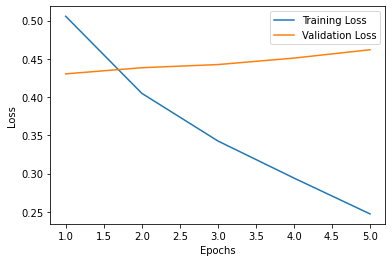

In [ ]:
import matplotlib.pyplot as plt

# Create a list of epoch numbers for x-axis
epochs_range = list(range(1, epochs + 1))

# Plot both training and validation loss on the same graph
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


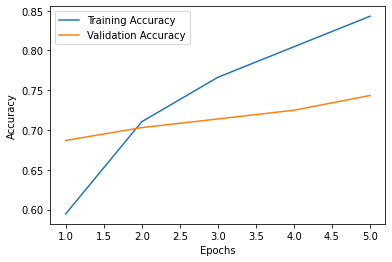

In [ ]:
import matplotlib.pyplot as plt

# Create a list of epoch numbers for x-axis
epochs_range = list(range(1, epochs + 1))

# Plot both training and validation loss on the same graph
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
df1 = pd.read_csv('mutli_clean_test.csv') # TODO : Uncomment this line to use the full dataset

label_encoder = LabelEncoder()
df1['encoded_label'] = label_encoder.fit_transform(df1['label'])
df1.dropna(axis=0,inplace=True)
df1.isnull().sum()



Unnamed: 0       0
ID               0
tweet            0
label            0
cleaned          0
encoded_label    0
dtype: int64

In [ ]:
texts = df1.cleaned.values # this assumes that the column containing the text is called "sentence"

In [ ]:
from helpers import tokenize_and_format, flat_accuracy
input_ids, attention_masks = tokenize_and_format(texts)
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
print('Original: ', texts[0])
print('Token IDs:', input_ids[0])

Original:  لا للفتنة لا للتخريب كلنا محسن فكري محسنفكري
Token IDs: tensor([     0,   1327,   1237,  10488,  22868,   1327,  28771, 130789,   1325,
          3047,   1069,  96558, 121051,    179,  96558,  70230,    179,      2,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1])


In [ ]:
test_set = [(input_ids[i], attention_masks[i]) for i in range(len(df1))]

In [ ]:
label=[]
id=[]
# Iterate through the test set
for i in range(len(test_set)):
  input_id_tensors = torch.tensor(test_set[i][0]).unsqueeze(0).to(device)
  input_mask_tensors = torch.tensor(test_set[i][1]).unsqueeze(0).to(device)
  with torch.no_grad():
    outputs = model(input_id_tensors, token_type_ids=None, attention_mask=input_mask_tensors)
  predicted_label = torch.argmax(outputs.logits, dim=1).item()
  id.append(predicted_label)

/tmp/ipykernel_2603522/571054579.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_id_tensors = torch.tensor(test_set[i][0]).unsqueeze(0).to(device)
/tmp/ipykernel_2603522/571054579.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_mask_tensors = torch.tensor(test_set[i][1]).unsqueeze(0).to(device)


In [ ]:
label=df1["encoded_label"].values

In [ ]:
sum=0
for i in range(len(id)):
  if id[i]==label[i]:
    sum=sum+1

In [ ]:
sum/len(id)

0.6943295044523156

In [ ]:
torch.save(model,"multi_lingual.pth")

In [ ]:
model=torch.load("multi_lingual.pth")

In [ ]:
model

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0): XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1

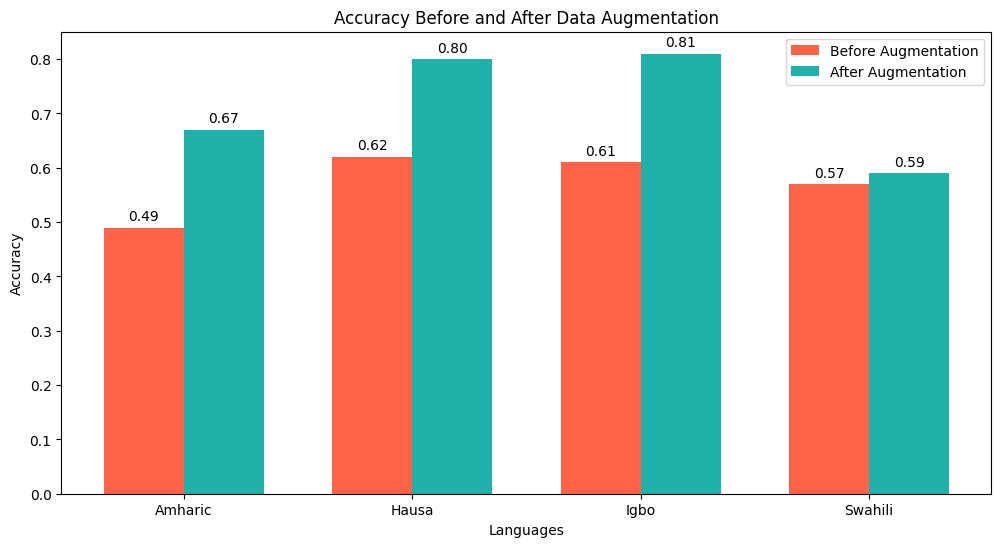

In [ ]:
import matplotlib.pyplot as plt

# Sample data
languages = ['Amharic', 'Hausa', 'Igbo','Swahili']
before_augmentation_accuracies = [0.49, 0.62,0.61, 0.57]
after_augmentation_accuracies = [0.67, 0.80, 0.81,0.59]

# Set up bar positions
bar_width = 0.35
r1 = range(len(languages))
r2 = [x + bar_width for x in r1]

# Increase the size of the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart with different attractive colors
bars1 = ax.bar(r1, before_augmentation_accuracies, width=bar_width, label='Before Augmentation', color='#FF6347')  # Tomato
bars2 = ax.bar(r2, after_augmentation_accuracies, width=bar_width, label='After Augmentation', color='#20B2AA')  # LightSeaGreen

# Add labels, title, and legend
ax.set_xlabel('Languages')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Before and After Data Augmentation')
ax.set_xticks([r + bar_width / 2 for r in range(len(languages))])
ax.set_xticklabels(languages)
ax.legend()

# Display accuracy values on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

# Show the plot
plt.show()


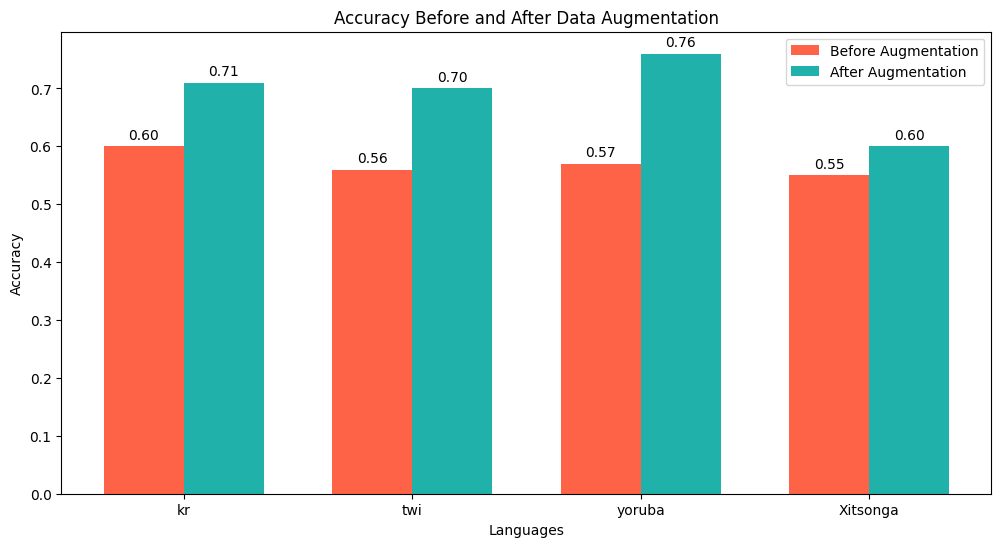

In [ ]:
import matplotlib.pyplot as plt

# Sample data
languages = ['kr', 'twi','yoruba', 'Xitsonga']
before_augmentation_accuracies = [0.60, 0.56,0.57,0.55]
after_augmentation_accuracies = [0.71, 0.70,0.76, 0.60]

# Set up bar positions
bar_width = 0.35
r1 = range(len(languages))
r2 = [x + bar_width for x in r1]

# Increase the size of the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart with different attractive colors
bars1 = ax.bar(r1, before_augmentation_accuracies, width=bar_width, label='Before Augmentation', color='#FF6347')  # Tomato
bars2 = ax.bar(r2, after_augmentation_accuracies, width=bar_width, label='After Augmentation', color='#20B2AA')  # LightSeaGreen

# Add labels, title, and legend
ax.set_xlabel('Languages')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Before and After Data Augmentation')
ax.set_xticks([r + bar_width / 2 for r in range(len(languages))])
ax.set_xticklabels(languages)
ax.legend()

# Display accuracy values on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(df1['encoded_label'],id)
print("------------------------------")
print("MultiLingual Language Metrics")
print("-------------------------------")
print(f'Accuracy: {accuracy}')

print(classification_report(df1['encoded_label'],id))

------------------------------
MultiLingual Language Metrics
-------------------------------
Accuracy: 0.6943295044523156
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     10203
           1       0.65      0.69      0.67     10207
           2       0.77      0.69      0.73      9799

    accuracy                           0.69     30209
   macro avg       0.70      0.69      0.70     30209
weighted avg       0.70      0.69      0.70     30209



In [ ]:
from sklearn.metrics import f1_score, classification_report
f1_micro = f1_score(df1['encoded_label'],id, average='micro')
f1_macro = f1_score(df1['encoded_label'],id, average='macro')
f1_weighted = f1_score(df1['encoded_label'],id, average='weighted')


In [ ]:
f1_weighted

0.6951318511015757